In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [23]:
data = pd.read_csv("D:\Advanced_training\Advanced-training-Python-AIML\Day-8\DailyDelhiClimateTrain.csv")

## univariant analysis

In [35]:
data.shape


(1462, 7)

In [41]:
data['date'] = pd.to_datetime(data['date'])
data

,date,meantemp,humidity,wind_speed,meanpressure,month,year
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013
...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,12,2016
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,12,2016
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,12,2016
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,12,2016


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
 5   month         1462 non-null   int32  
 6   year          1462 non-null   int32  
dtypes: float64(4), int32(2), object(1)
memory usage: 68.7+ KB


In [38]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure,month,year
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548,6.519152,2014.502736
std,7.348103,16.769652,4.561602,180.231668,3.451727,1.120248
min,6.000000,13.428571,0.000000,-3.041667,1.000000,2013.000000
25%,18.857143,50.375000,3.475000,1001.580357,4.000000,2014.000000
50%,27.714286,62.625000,6.221667,1008.563492,7.000000,2015.000000
75%,31.305804,72.218750,9.238235,1014.944901,10.000000,2016.000000
max,38.714286,100.000000,42.220000,7679.333333,12.000000,2017.000000


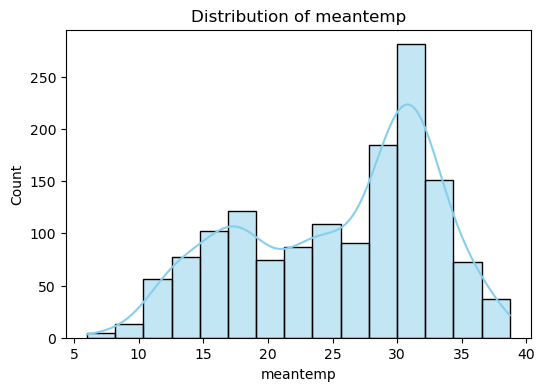

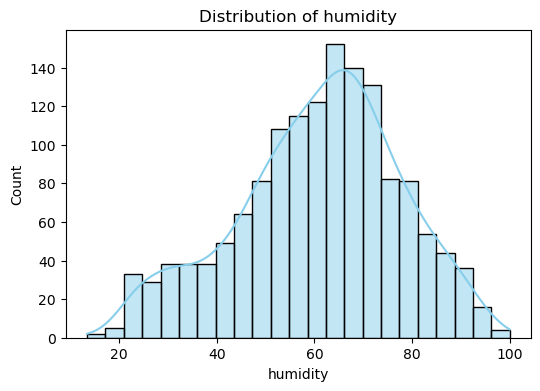

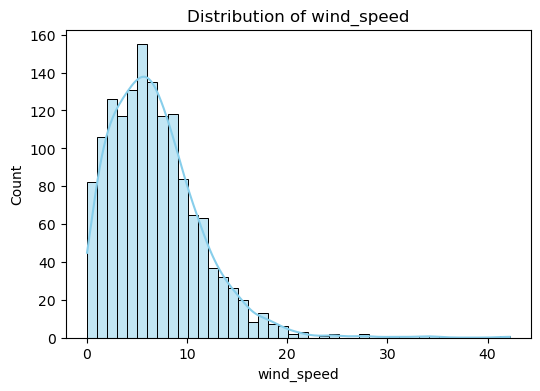

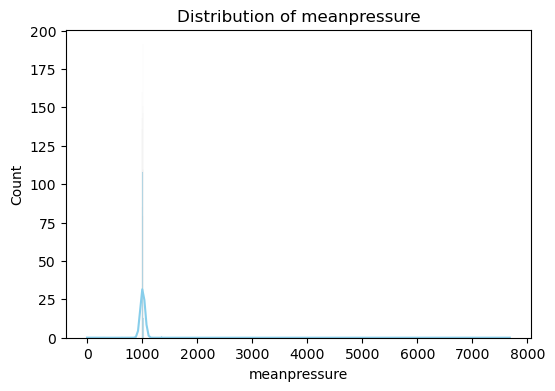

In [55]:
numeric_cols = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()


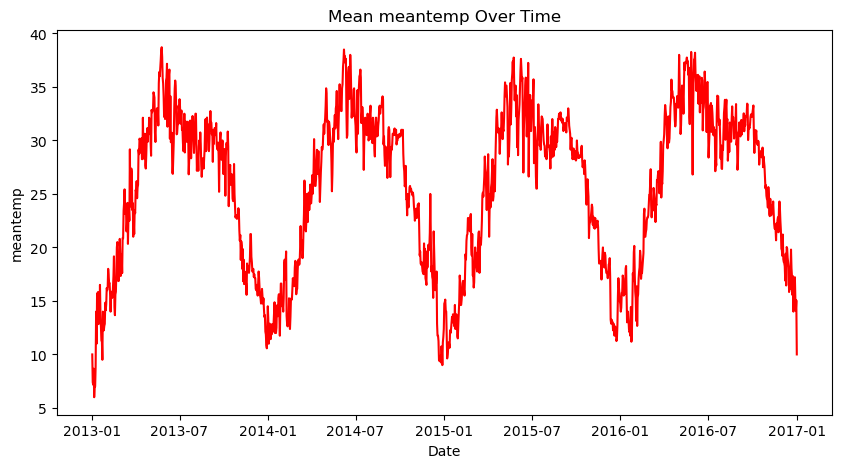

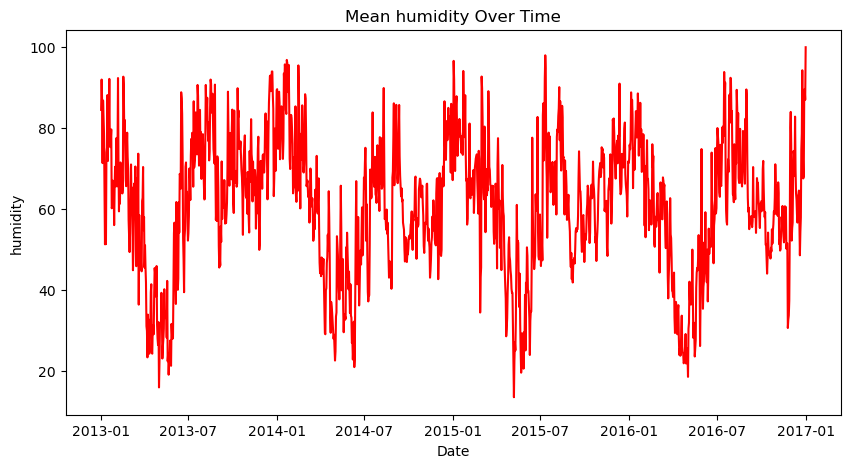

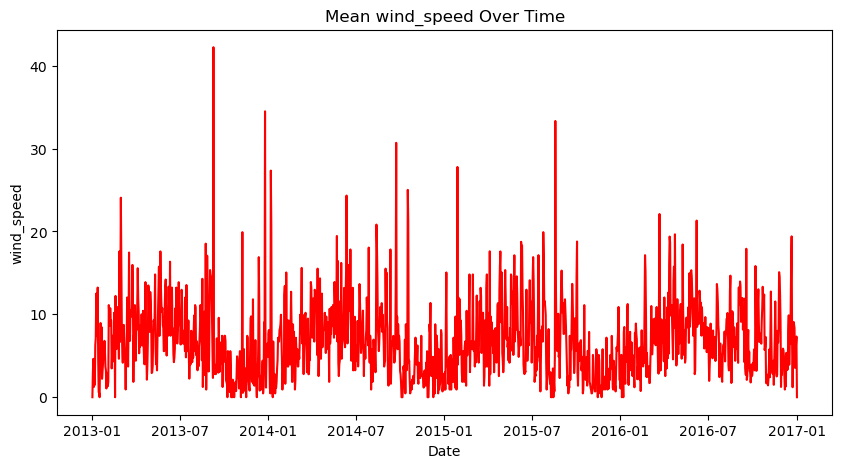

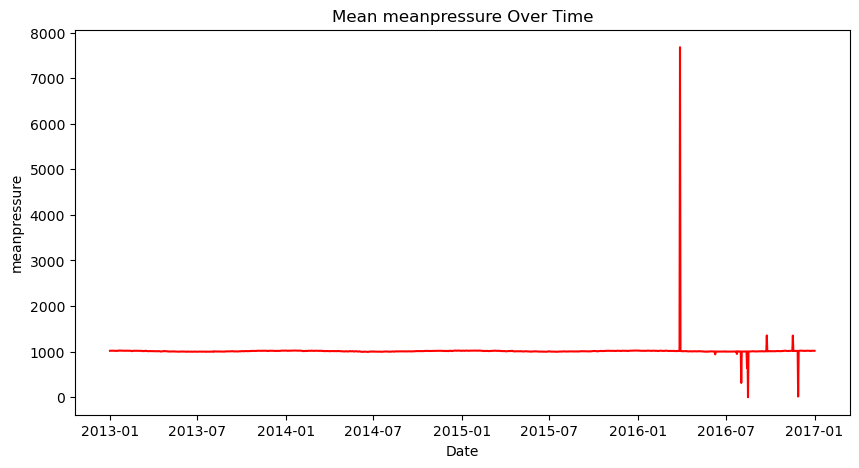

In [59]:
for col in  ['meantemp', 'humidity', 'wind_speed', 'meanpressure']:
    plt.figure(figsize=(10,5))
    plt.plot(data['date'], data[col], color='red')
    plt.title(f'Mean {col} Over Time'.format('col'))
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.show()


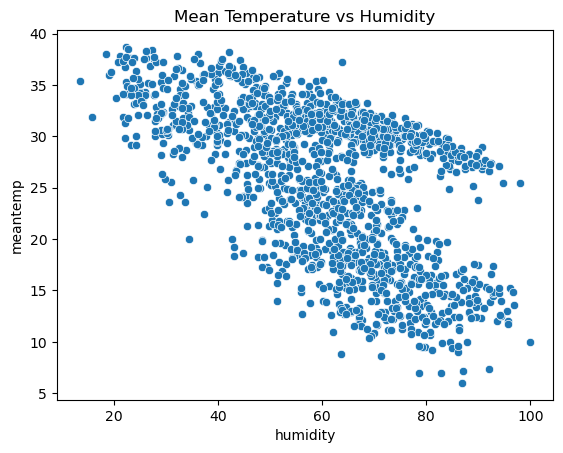

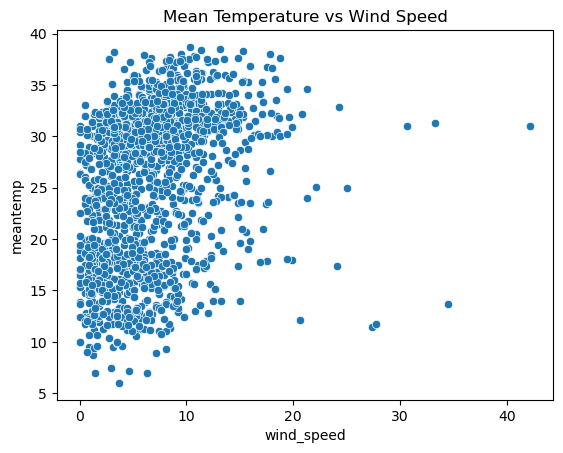

In [61]:
sns.scatterplot(x='humidity', y='meantemp', data=data)
plt.title('Mean Temperature vs Humidity')
plt.show()

sns.scatterplot(x='wind_speed', y='meantemp', data=data)
plt.title('Mean Temperature vs Wind Speed')
plt.show()


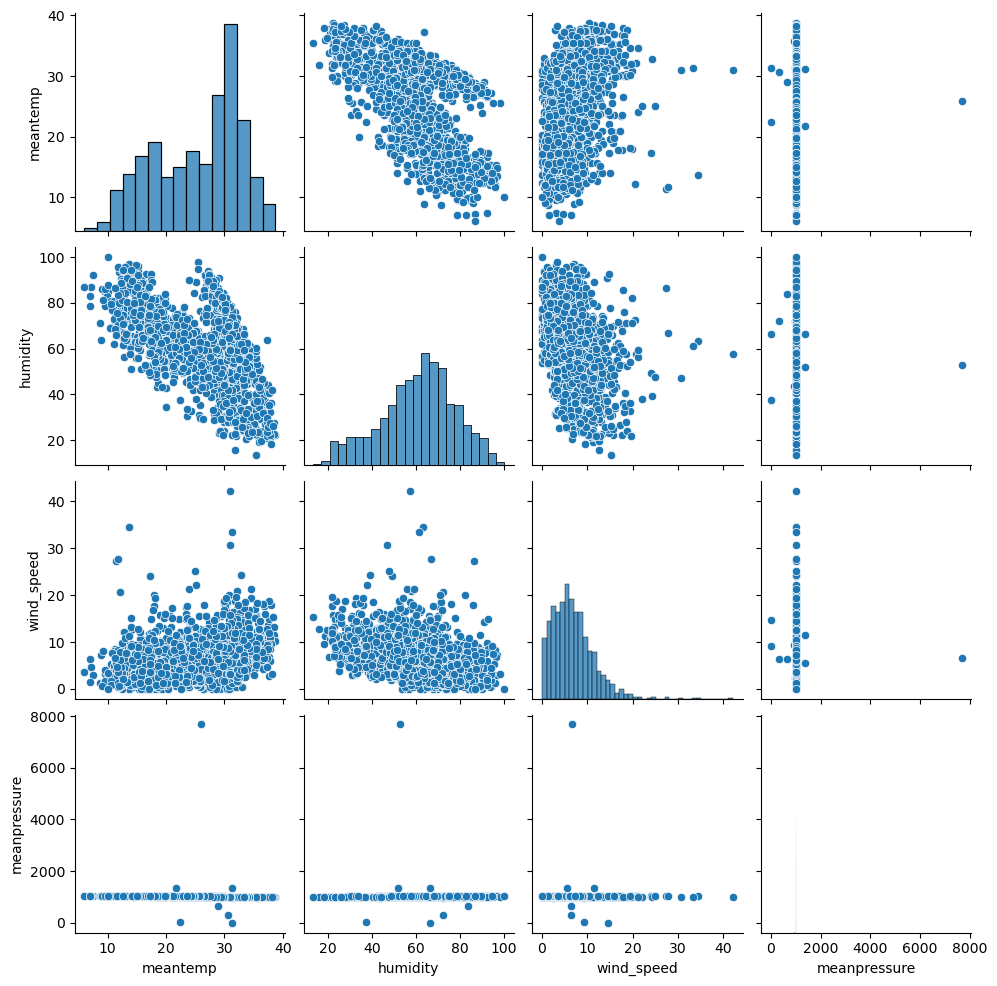

In [28]:
sns.pairplot(data)

<Axes: >

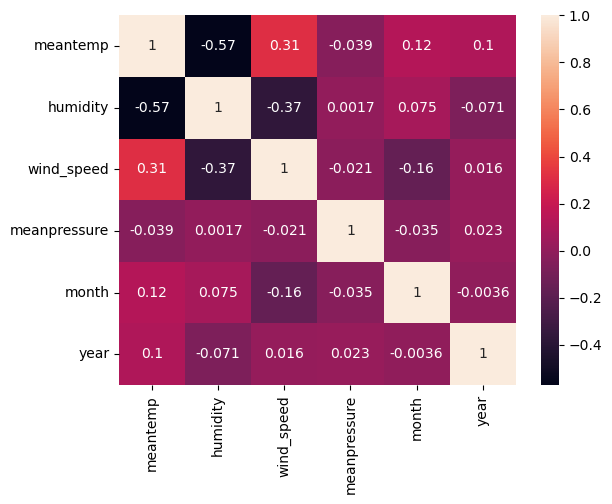

In [64]:
    sns.heatmap(data.corr(numeric_only=True),annot=True)

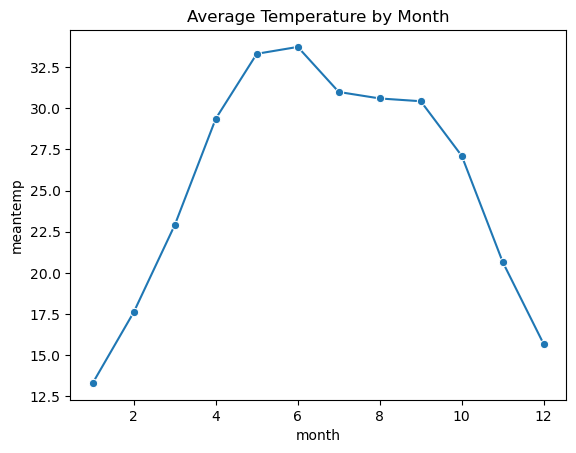

In [69]:
month_avg = data.groupby('month')[['meantemp', 'humidity', 'wind_speed']].mean()
sns.lineplot(x='month', y='meantemp', data=month_avg, marker='o')
plt.title('Average Temperature by Month')
plt.show()


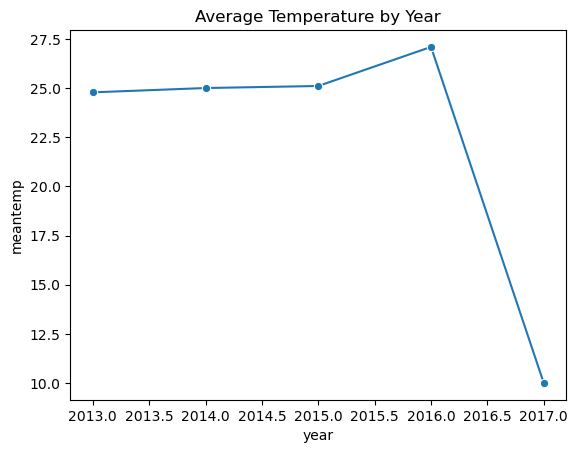

In [68]:
year_avg = data.groupby('year')[['meantemp', 'humidity']].mean()
sns.lineplot(x='year', y='meantemp', data=year_avg, marker='o')
plt.title('Average Temperature by Year')
plt.show()


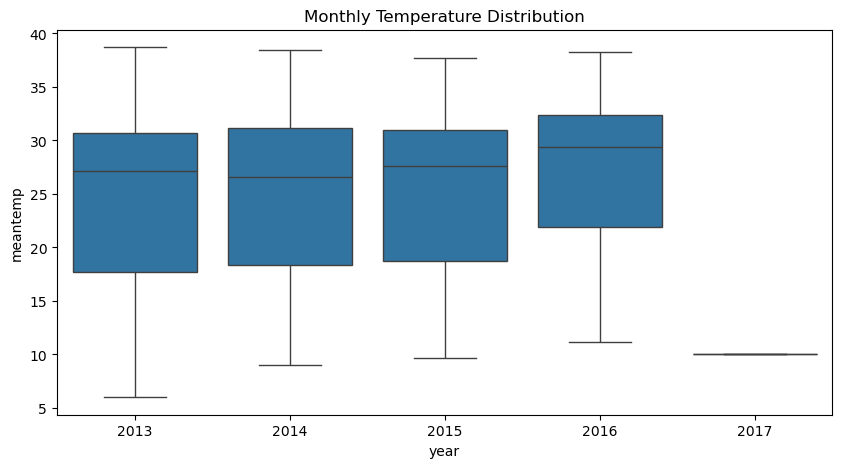

In [73]:
plt.figure(figsize=(10,5))
sns.boxplot(x='year', y='meantemp', data=data)
plt.title('yearly Temperature Distribution')
plt.show()


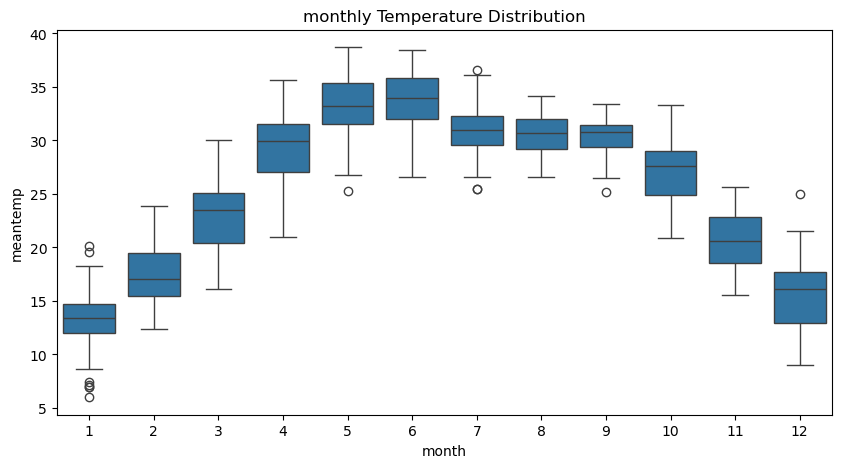

In [74]:
plt.figure(figsize=(10,5))
sns.boxplot(x='month', y='meantemp', data=data)
plt.title('monthly Temperature Distribution')
plt.show()

In [29]:
data['month']=pd.to_datetime(data['date']).dt.month
data['year']=pd.to_datetime(data['date']).dt.year

In [30]:
data.corr(numeric_only=True)

,meantemp,humidity,wind_speed,meanpressure,month,year
meantemp,1.000000,-0.571951,0.306468,-0.038818,0.122667,0.103803
humidity,-0.571951,1.000000,-0.373972,0.001734,0.074950,-0.071381
wind_speed,0.306468,-0.373972,1.000000,-0.020670,-0.160668,0.015642
meanpressure,-0.038818,0.001734,-0.020670,1.000000,-0.035055,0.022501
month,0.122667,0.074950,-0.160668,-0.035055,1.000000,-0.003642
year,0.103803,-0.071381,0.015642,0.022501,-0.003642,1.000000


In [44]:
data.groupby('year').count()

,date,meantemp,humidity,wind_speed,meanpressure,month
year,,,,,,
2013,365,365,365,365,365,365
2014,365,365,365,365,365,365
2015,365,365,365,365,365,365
2016,366,366,366,366,366,366
2017,1,1,1,1,1,1


In [49]:
## maximum temprature on each year
data.groupby('year')['meantemp'].max()

year
2013    38.714286
2014    38.500000
2015    37.750000
2016    38.272727
2017    10.000000
Name: meantemp, dtype: float64

In [53]:
#each month of the year maximum temp 
data.groupby(['year','month'])['meantemp'].agg(['max','min','mean'])

max        min       mean
year month                                 
2013 1      16.500000   6.000000  12.074770
     2      20.800000  13.666667  16.867560
     3      29.166667  17.333333  22.814209
     4      32.125000  24.600000  28.895119
     5      38.714286  28.571429  33.776767
     6      37.166667  26.875000  32.480873
     7      33.857143  26.833333  30.663594
     8      32.500000  26.600000  29.547773
     9      32.750000  25.200000  29.840595
     10     30.833333  22.666667  26.129186
     11     23.428571  15.571429  18.811706
     12     18.000000  10.571429  15.179339
2014 1      16.625000  11.000000  13.431836
     2      19.625000  12.375000  15.746811
     3      26.250000  16.125000  21.593318
     4      33.250000  24.250000  28.058333
     5      35.250000  25.250000  31.405530
     6      38.500000  30.250000  34.770833
     7      36.625000  27.250000  32.034163
     8      34.125000  27.625000  31.411968
     9      31.250000  26.500000  29.762500
     10     31.000000  23.000000  26.496544
     11     24.125000  16.500000  20.104167
     12     25.000000   9.000000  14.823733
2015 1      15.125000   9.625000  12.708525
     2      23.125000  14.625000  18.791454
     3      28.500000  16.250000  21.547811
     4      32.875000  21.000000  28.002976
     5      37.750000  27.750000  33.352535
     6      37.625000  26.625000  32.737500
     7      35.714286  25.500000  30.409562
     8      32.625000  27.375000  30.330789
     9      33.000000  28.250000  30.650000
     10     30.000000  20.875000  26.865207
     11     24.000000  17.000000  20.754167
     12     19.250000  11.250000  14.989631
2016 1      20.142857  11.187500  15.139363
     2      23.875000  12.666667  19.025676
     3      30.000000  22.375000  25.701075
     4      35.687500  29.266667  32.550029
     5      38.272727  26.812500  34.728726
     6      38.200000  30.785714  34.946836
     7      34.187500  27.125000  30.875806
     8      33.809524  27.259259  31.116578
     9      33.444444  27.960000  31.479768
     10     33.269231  24.538462  28.961680
     11     25.640000  19.869565  22.957378
     12     21.208333  14.000000  17.672565
2017 1      10.000000  10.000000  10.000000